# Lesson 26: Python style

*This lesson was generated from a Jupyter notebook.  You can download the notebook [here](l26_pep8.ipynb).*

In [1]:
import numpy as np
import pandas as pd

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

This lesson is all about style.  Style in the general sense of the work is very important.  It can have a big effect on how people interact with a program or software.  As an example, we can look at the style of data presentation.  We'll download data and plot the Keeling curve, which is a measure of CO$_2$ concentration on top of Muana Loa over time.  We'll use Pandas to download the data; we'll learn more about Pandas in upcoming lessons.

/Users/Justin/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


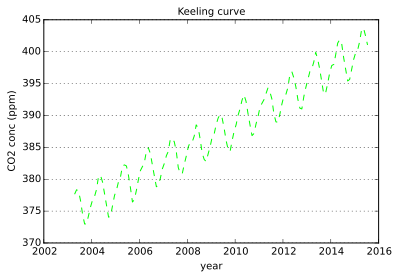

In [4]:
# Use Pandas to download data
url = 'http://bit.ly/1FtUJTU'
df = pd.read_csv(url, usecols=[3, 4], skiprows=600, header=None, sep=',\s*', 
                 na_values='-99.99')

# Extract year and CO2 values
year = df[3].values
co2 = df[4].values

# Generate ugly plot
plt.plot(year, co2, color=(0, 1, 0), marker='None', linestyle='--', linewidth=1)
plt.grid(axis='y')
plt.xlabel('year', fontsize=10)
plt.ylabel('CO2 conc (ppm)', fontsize=10)
plt.title('Keeling curve', fontsize=10)

Lest you think this plot is a ridiculous way of showing the data, I can tell you I have seen plots just like this in the literature.  Now, let's look at a nicer plot.

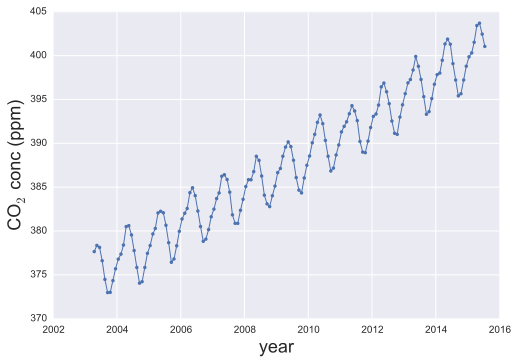

In [7]:
# Seaborn makes plots pretty!
import seaborn as sns

# Set JB's favorite Seaborn settings
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18, 
    'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)

# Make a nicer plot
plt.plot(year, co2, marker='.', linestyle='-', linewidth=1)
plt.xlabel('year')
plt.ylabel('CO$_2$ conc (ppm)')

Yes, style matters in the presetnation of data!  The top one hurts the eyes.  The same is true for code.  Style matters!  We already discussed how important documentation is, but having a well-defined style also helps keep your code clean, easy to read, and therefore easier to debug and share.

## PEP 8
Guide van Rossum is the benevolent dictator for life (BDFL) of Python.  He invented Python, and he ultimately decides what happens with the language.  To get new features or other enhancements into the language, Guido either writes or (usually) considers a **Python Enhancement Proposal**, or a **PEP**.  Each PEP is carefully reviewed and there are many iterations with the PEP's author(s).  Ultimately, Guido decides if the PEP becomes part of the Python language.

Perhaps the best-known PEPs are **PEP 8** and PEP 20.  This lesson is about PEP 8, but we'll pause for a moment to look at PEP 20 to understand why PEP 8 is important.  PEP 20 is "The Zen of Python."  You can see it's text by doing `import this`.

In [8]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


These are good ideas for coding practice in general.  Importantly, beautiful, simple, readable code is a goal of a programmer.  That's where PEP 8 comes in.  PEP8 is the **Python Style Guide**, written by Guido, Barry Warsaw, and Nick Coghlan.  You can read its full text in the [Python PEP index](https://www.python.org/dev/peps/pep-0008/), and I recommend you do that.  I also recommend you follow everything it says!  It helps you a lot.  Trust me; my life got much better after I started following PEP 8's rules.

Note, though, that you code will work just fine if you break PEP 8's rules.  In fact, some companies have their own style guides.  Google's style, for example, is different than PEP 8.  And they even hired Guido after PEP 8 was released!

## Key points of PEP 8
PEP 8 is extensive, but here are some key points for you to keep in mind as you are being style-conscious.

* Variable names need to be descriptive.
* Variable names are all lower case with underscores separating words.
* Do not name variales `l`, `O`, or `I` because they are hard to distinguish from ones and zeros.
* Function names are lower case and may use underscores.
* Class names are in CamelCase.
* Module names are short and lower case.  Underscores should be avoided unless necessary for readability.
* Lines are maximally 79 characters long.
* Doc strings are maximally 72 characteres long.
* Avoid in-line comments; put the comment directly above the code.
* Avoid excessive comments that state the obvious.
* Generally, put single spaces around binary operators, unless omitting space improves readability.  For example, `x**2 + y**2`.  Low priority operators should have space.
* Assignment operators should always have single spaces around them *except* when in keyword arguments.  E.g., no space in `f(x, y=4)`.
* Put spaces after commas in function definitions and calls.  This also applies for lists, tuples, NumPy arrays, etc.
* Avoid excessive spaces within parentheses, braces, and brackets.
* Use a single blank line to separate logical sections of your code.
* Put two blank lines between functions in a `.py` file.
* Put all import statements at the top of the file, importing from one module per line.

## Some examples of PEP 8-ified code
Let's now look at some examples of code adhering to PEP 8 and code that does not.  We'll start with some code we used before to find start codons.

In [9]:
seq='AUCUGUACUAAUGCUCAGCACGACGUACG'
c='AUG'  # This is the start codon
i =0  # Initialize sequence index
while seq[ i : i + 3 ]!=c:
    i+=1

print('The start codon starts at index', i)

The start codon starts at index 10


Compare that to the PEP 8-ified version.

In [10]:
start_codon = 'AUG'

# Initialize sequence index for while loop
i = 0

# Scan sequence until we hit the start codon
while seq[i:i+3] != start_codon:
    i += 1
    
print('The start codon starts at index', i)

The start codon starts at index 10


The descriptive variable names, the spacing, the appropiate comments all make it much more readabe.

Here's another example, the dictionary mapping single-letter residue symboles to the three-letter equivalents.

In [11]:
aa_dict = { 'A' : 'Ala' , 'R' : 'Arg' , 'N' : 'Asn' , 'D' : 'Asp' , 'C' : 'Cys' , 'Q' : 'Gln' , 'E' : 'Glu' , 'G' : 'Gly' , 'H' : 'His' , 'I' : 'Ile' , 'L' : 'Leu' , 'K' : 'Lys' , 'M' : 'Met' , 'F' : 'Phe' , 'P' : 'Pro' , 'S' : 'Ser' , 'T' : 'Thr' , 'W' : 'Trp' , 'Y' : 'Tyr' , 'V' : 'Val' }

My god, that is awful.  The PEP 8 version, where we break lines to make things clear, is so much more readable.

In [12]:
aa_dict = {'A': 'Ala',
           'R': 'Arg',
           'N': 'Asn',
           'D': 'Asp',
           'C': 'Cys',
           'Q': 'Gln',
           'E': 'Glu',
           'G': 'Gly',
           'H': 'His',
           'I': 'Ile',
           'L': 'Leu',
           'K': 'Lys',
           'M': 'Met',
           'F': 'Phe',
           'P': 'Pro',
           'S': 'Ser',
           'T': 'Thr',
           'W': 'Trp',
           'Y': 'Tyr',
           'V': 'Val'}

Finally, we'll close with the quadratic formula.

In [16]:
def qf(a, b, c):
    return -(b-np.sqrt(b**2-4*a*c))/2/a, (-b-np.sqrt(b**2-4*a*c))/2/a

It works just fine.

In [18]:
qf(2, -3, -9)

(3.0, -1.5)

But it is illegible.  Let's do a  PEP 8-ified version.

In [19]:
def quadratic_roots(a, b, c):
    """Real roots of a second order polynomial."""
    
    # Compute square root of the discriminant
    sqrt_disc = np.sqrt(b**2 - 4 * a * c)
    
    # Compute two roots
    root_1 = (-b + sqrt_disc) / (2*a)
    root_2 = (-b - sqrt_disc) / (2*a)

    return root_1, root_2

And this also works!

In [21]:
quadratic_roots(2, -3, -9)

(3.0, -1.5)

## This is really important.
I want to reiterate how important this is.  Most programmers follow these rules closely, but most scientists do not.  I can't tell you how many software packages written by scientists that I have encountered and found to be almost completely unreadable.  Many of your colleagues will pay little attention to style.  **You should.**